In [1]:
%cd C:\Users\debie\Documents\kaggle

C:\Users\debie\Documents\kaggle


# Predicting diamond's price

In this project, the goal is to predict the price of diamonds by their cut, color, clarity, price, and other attributes.
To do that, we have a dataset of more than 50 000 diamonds with their features and their price.

The columns of the dataset is as followed:

-price: price in US dollars 

-carat: weight of the diamond 

-cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

-color: diamond colour, from J (worst) to D (best)

-clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

-x: length in mm

-y: width in mm 

-z: depth in mm 

-depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)

-table: width of top of diamond relative to widest point

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
diamonds = pd.read_csv('diamonds.csv')

Let's take a look at the dataset:

In [4]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We removed the column "Unanmed: 0" as it was not relevent.

The dataset contains 53940 diamonds and there is no missing values in it.

Let's take a look at the price and the carat of the diamonds.

In [7]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d684be16a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d684be1d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d684be1250>],
 'medians': [<matplotlib.lines.Line2D at 0x1d684bf0460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d684bf07f0>],
 'means': []}

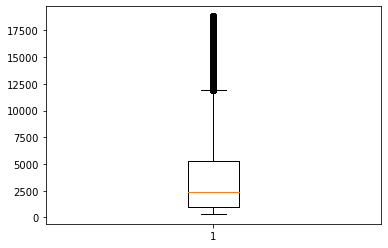

In [8]:
plt.boxplot(diamonds['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d684cca7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d684ccaf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d684cca460>],
 'medians': [<matplotlib.lines.Line2D at 0x1d684cd7670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d684cd7a00>],
 'means': []}

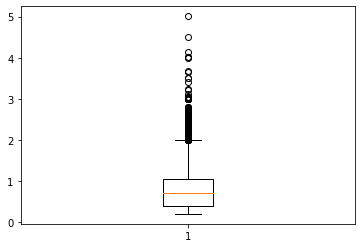

In [9]:
plt.boxplot(diamonds['carat'])

We can see that in these 2 columns (price and carat) there are outlier values that needs to me removed. As a rule, we remove the values that are below the first quartile minus 1.5 times the inter quartile range, and the one above the third quartile plus 1.5 times the inter quartile range.

In [10]:
def remove_outlier(df, column):
    quart_1 = df[column].quantile(0.25)
    quart_3 = df[column].quantile(0.75)
    inter_quart_rng = quart_3 - quart_1
    return df[(df[column] <= quart_3 + 1.5 * inter_quart_rng) & (df[column] >= quart_1 - 1.5 * inter_quart_rng)]

In [11]:
diamonds = remove_outlier(diamonds, 'price')
diamonds = remove_outlier(diamonds, 'carat')

Now that we removed the outlier values, let's adapt the dataframe to facilitate the training of our algorithm.

Below we transform the categorical values of the columns 'cut', 'color' and 'clarity' into numerical values, each corresponding to a category.

In [12]:
from sklearn.preprocessing import OrdinalEncoder

categorical_feats = ['cut', 'color', 'clarity']

encoder = OrdinalEncoder()
diamonds[categorical_feats] = encoder.fit_transform(diamonds[categorical_feats])
diamonds[categorical_feats].head()

,cut,color,clarity
0,2.0,1.0,3.0
1,3.0,1.0,2.0
2,1.0,1.0,4.0
3,3.0,5.0,5.0
4,1.0,6.0,3.0


Let's look at the columns descriptions:

In [13]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000
mean,0.715756,2.549313,2.536743,3.858018,61.749903,57.417129,3122.587322,5.568415,5.572035,3.439029
std,0.369533,1.026135,1.685555,1.732636,1.417246,2.226349,2724.401592,0.978111,0.978031,0.619484
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,2.000000,1.000000,2.000000,61.100000,56.000000,907.000000,4.660000,4.680000,2.870000
50%,0.660000,2.000000,3.000000,4.000000,61.800000,57.000000,2131.000000,5.560000,5.560000,3.410000
75%,1.010000,3.000000,4.000000,5.000000,62.500000,59.000000,4624.500000,6.420000,6.415000,3.980000
max,1.950000,4.000000,6.000000,7.000000,79.000000,79.000000,11883.000000,8.160000,31.800000,31.800000


The minimum value for x, y and z is 0 which should not be possible. Let's remove the rows with 0 in eitheir of those columns.

In [14]:
diamonds = diamonds.drop(diamonds[diamonds['x']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['y']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['z']==0].index)

We can now begin to train some model to predict the price of diamonds:

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

We divide the dataset into 2 different one, one for training the algorithm (train, with 80 % of the rows) and one for testing its accuracy (test, with 20 % of the rows).

In [16]:
train ,test = train_test_split(diamonds,test_size = 0.2,random_state = 15 )

In [17]:
columns = list(train.columns)
columns.remove('price')

We write a function that will take the estimator, the training and testing set as an input and output accuracy metrics with the train and test dataset.

The accuracy metrics are, by order in the output lists, the Root Mean Squared Error (RMSE), the Mean Absolute Erorr (MAE) and the coefficient of determination (R2 score). We print 2 list of thiese metrics: one for the training set and one for the testing set.

We'll apply the linear regression model and the random forest model.

In [18]:
def modeling(estimator, train, test):
    train_predictions = estimator.predict(train[columns])
    test_predictions = estimator.predict(test[columns])

    train_mse = mean_squared_error(train_predictions, train['price'])
    test_mse = mean_squared_error(test_predictions, test['price'])

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mae = mean_absolute_error(train_predictions, train['price'])
    test_mae = mean_absolute_error(test_predictions, test['price'])

    train_r2 = r2_score(train_predictions, train['price'])
    test_r2 = r2_score(test_predictions, test['price'])

    print([train_rmse, train_mae, train_r2])
    print([test_rmse, test_mae, test_r2])

In [19]:
lr = LinearRegression()
lr.fit(train[columns], train['price'])

modeling(lr,train,test)

[915.8935057365966, 614.5574499885623, 0.872080502793495]
[965.9496631719579, 623.5773880644399, 0.8630424762432158]


With the linear regression algorithm we got a R2 score of 0.863 out of 1 for the testing set.
The RMSE is 965 dollars and the MAE is 623 dollars.

It can be improved.

In [20]:
rf = RandomForestRegressor(n_estimators = 30, max_features = 8)
rf.fit(train[columns], train['price'])

modeling(rf,train,test)

[144.22211762178745, 77.78386052060007, 0.9971584641521827]
[382.0623990923726, 207.8722779329919, 0.9802681550600807]


With the random forest regression algorithm we got a R2 score of 0.98 out of 1 for the testing set, The RMSE is 380 dollars and the MAE is 206 dollars. It is quite good.

Let's continue to use this algorithm as it has shown good results, but let's now search for better parameters to use with it:

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [5,10,25,50], 'max_features':[8,10,15,20]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[5,10,25]}
]
rfr = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(rfr,param_grid,cv = 5,return_train_score = True)
grid_search.fit(train[columns], train['price'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid=[{'max_features': [8, 10, 15, 20],
                          'n_estimators': [5, 10, 25, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 10, 25]}],
             return_train_score=True)

In [22]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=50, random_state=1)

In [23]:
rf = RandomForestRegressor(max_features=7, n_estimators=25, random_state=1)
rf.fit(train[columns], train['price'])

modeling(rf,train,test)

[148.0094334273974, 79.28200788918785, 0.9970040273928158]
[378.74588984831894, 207.31401555150097, 0.9805752687525762]


The result we got are slightly better than before: R2 score of 0.981 out of 1, RMSE of 378 dollars and the MAE is 207 dollars. The parameters used to get this result are max_features = 8, n_estimators = 50.

In [24]:
diamonds['price'].describe()

count    50107.000000
mean      3122.392081
std       2724.618137
min        326.000000
25%        907.000000
50%       2131.000000
75%       4624.000000
max      11883.000000
Name: price, dtype: float64

Realtively of the standard deviation value (2724), we can say that the RMSE and the MAE values are satisfactory and the predictions obtained quite close to the real prices.